# Get Data

- Åpne filen med aksjedata
- Bare bruk pandas for å få alt dataen

In [ ]:
# Forklarer biblioteker i Prosjekt forklaring

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

file = "NVDA.json" # finner filen

nd = pd.read_json(file) # nd = NVIDIA data, leser av med pandas

## Innledende analyser av NVIDIA-data

Før jeg går videre med selve analysen, gjennomfører jeg noen grunnleggende tester for å få en oversikt over datasettet og sikre at alt er i orden. Dette inkluderer blant annet en sjekk for manglende verdier. Resultatene viser at datasettet er komplett, uten manglende observasjoner, noe som er en viktig å vite før man analyserer dataen.

In [40]:
# Sjekker først hvis noe data mangler

print(nd.isnull().sum())

chart    1
dtype: int64


In [41]:
# Ser på første og siste del av dataen

print(nd.head())

print(nd.tail())

                                                    chart
result  [{'meta': {'currency': 'USD', 'symbol': 'NVDA'...
error                                                None
                                                    chart
result  [{'meta': {'currency': 'USD', 'symbol': 'NVDA'...
error                                                None


In [42]:
# DataFrame information

print(nd.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, result to error
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   chart   1 non-null      object
dtypes: object(1)
memory usage: 32.0+ bytes
None


In [43]:
# Summary statistics
print(nd.describe())

                                                    chart
count                                                   1
unique                                                  1
top     [{'meta': {'currency': 'USD', 'symbol': 'NVDA'...
freq                                                    1


# Plotting av data

Her starter jeg med visualiseringen av NVIDIA dataene. Først henter jeg de relevante verdiene fra JSON-filen ved å navigere til riktig del av datastrukturen. For hver del appender jeg alle de nødvendige verdiene til en liste, definert som tom på toppen.

En utfordring når jeg gjorde dette erat tidsstemplene er lagret i Unix-format, noe som krever en konvertering til et lesbart datoformat (DD-MM-YYYY). Etter litt søking fant jeg en passende metode for å håndtere dette.

Til slutt plotter jeg listene mot hverandre for å analysere sammenhengen mellom variablene og identifisere eventuelle trender i dataene.


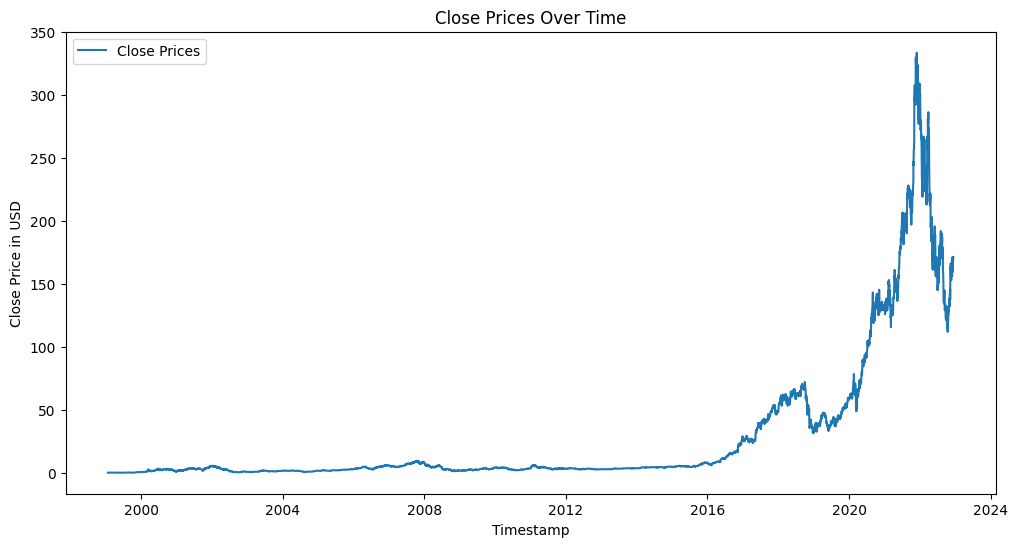

In [44]:
# Plotter data med å lage lister å for hver del av dataen setter jeg det in i listen

time_list = []
close_prices = []


timestamps = nd['chart']['result'][0]['timestamp']
close = nd['chart']['result'][0]['indicators']['quote'][0]['close']


for time in timestamps:
    # Hvordan å konvertere unix tiden til dato
    time_list.append(datetime.fromtimestamp(time))

for price in close:
    close_prices.append(price)


# Veldig selv-forklart hva som skjer, lager størrelse på figuren, plotter ting opp mot hverandre, lager titler.

plt.figure(figsize=(12, 6))
plt.plot(time_list, close_prices, label='Close Prices')
plt.xlabel('Timestamp')
plt.ylabel('Close Price in USD')
plt.title('Close Prices Over Time')
plt.legend() # Litt unødvendig, men 🤷‍♂️
plt.show()


## Generelle observasjoner fra grafen

Første tingen jeg la merke til er at dataene kun går frem til slutten av 2022. Dette betyr at nyere utviklinger, som DeepSeek og den generelle fremgangen innen AI, ikke er reflektert i aksjekursene (veldig leit).

Men videre sammenlignet med grafe Apple aksjene er bruken av pandas enkelt å hente og analysere dataene, slik at prosessen har vært langt mer effektiv enn å gjøre det manuelt.

Siden datasettet dekker perioden fra 1999 og fremover, kan det være utfordrende å identifisere de store kursendringene tidlig på 2000-tallet i en samlet graf. For å få en mer detaljert forståelse av kursutviklingen, vil jeg, lik til i analysen av Apple, også se nærmere på de daglige svingningene for å vurdere volatiliteten.



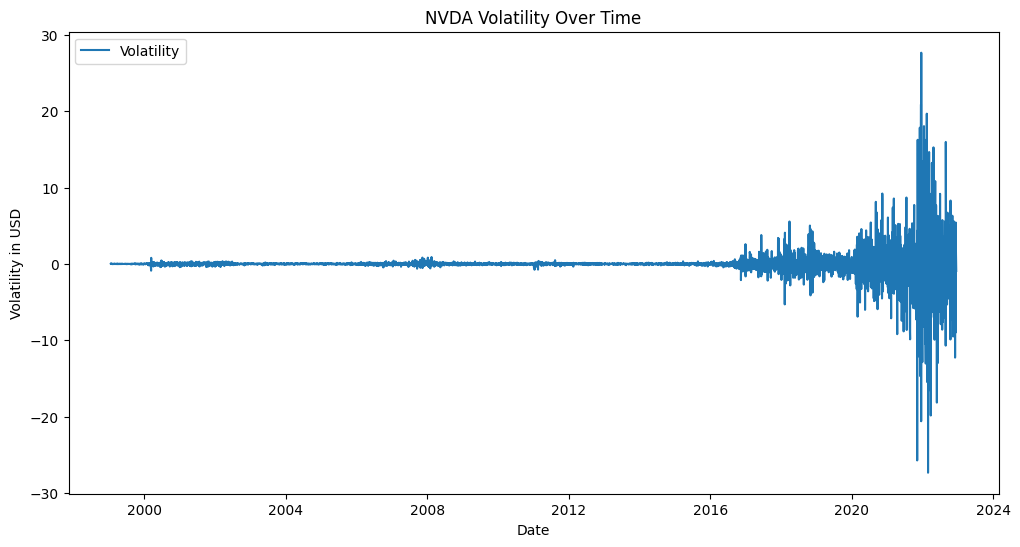

In [45]:
# Samme teknikk som før med å finne data, bare forskjellig sted.

open_prices = []
volatility = []

open_ = nd['chart']['result'][0]['indicators']['quote'][0]['open']

for price in open_:
    open_prices.append(price)

# Fant ut man kan bruke zip funksjonen her, ser på diferanse.
for open, close in zip(open_prices, close_prices):
    volatility.append(open - close)

# Samme plotting som før med forskjellige titler.
plt.figure(figsize=(12, 6))
plt.plot(time_list, volatility, label='Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility in USD')
plt.title('NVDA Volatility Over Time')
plt.legend()
plt.show()

## Volatilitet i NVIDIA-aksjen


Tidlige kursendringer kan være vanskelig å skille ut, men det er tre tydelige perioder som skiller seg ut i den ellers stabile fasen mellom 1999 og 2016. Jeg vil undersøke disse nærmere, samt analysere den moderne utviklingen av NVIDIA, for å forstå hvilke faktorer som påvirket aksjekursen i fortiden.

![Volatility](https://www.investopedia.com/thmb/rjgqLgYsW1eyIt3OvJdLwy4yIys=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/Volatility-89fb205b705c493ba02c00a3fc4964cd.jpg)

---

## 1999–2016

I løpet av de første 17 årene av selskapets eksistens var ikke aksjekursen veldig forskjellig over tid. Det var så klart store svingninger underveis, men i en samlet graf fremstår perioden relativt stabil. Ved å analysere disse bevegelsene nærmere kan vi få en bedre forståelse av hvilke markedsforhold og hendelser som drev kursendringene i denne perioden.

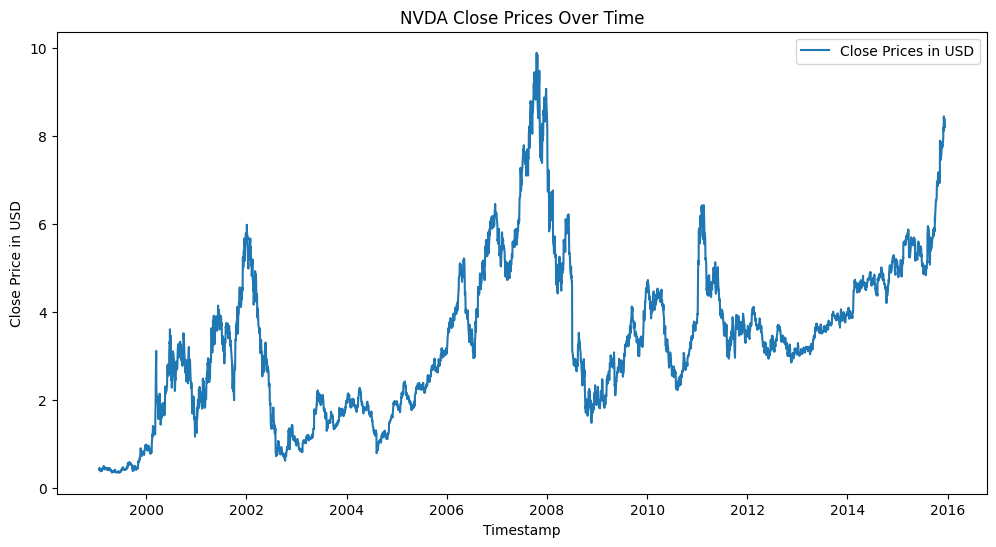

In [46]:
# Siden listene har alt data kan jeg bare bruke indeksering for å avgrense de og se på mindre deler.

plt.figure(figsize=(12, 6))
plt.plot(time_list[:4250], close_prices[:4250], label='Close Prices in USD')
plt.xlabel('Timestamp')
plt.ylabel('Close Price in USD')
plt.title('NVDA Close Prices Over Time')
plt.legend()
plt.show()

## **Dot-com-boblen (1999–2002)**  

Som **Apple** er **NVIDIA** en del av teknologisektoren, men i motsetning til mange dot-com-selskaper hadde **NVIDIA** et solid produkt i form av **GPU-er** (**grafikkprosessorer**), som var essensielle for datamaskiner. Dette ga selskapet en viss grad av beskyttelse under **dot-com-krasjet**.  

En interessant observasjon er den forsinkede effekten av **dot-com-boblen** på **NVIDIA** sin aksjekurs. I stedet for å falle helt i **2001**, steg aksjen en periode. Dette skyldtes flere faktorer:  

- **Sterk produktlansering**: **NVIDIA** lanserte [**GeForce 3**](https://en.wikipedia.org/wiki/GeForce_3_series) i **2001**, som var den kraftigste **GPU-en** på markedet og svært populær blant gamere.  
- **Strategisk samarbeid**: Samme år fikk **NVIDIA** en kontrakt med **Microsoft** om å levere **GPU-en** til den originale **Xbox**, noe som bidro til optimisme rundt selskapet.  

Likevel, etter at den første bølgen av **dot-com-krasjet** la seg, gikk også **PC-markedet** inn i en nedgangsperiode. **NVIDIA** overproduserte **GPU-er**, noe som førte til **lageroverskudd** og prisfall. Dette rammet aksjekursen hardt i **2002**.  Mer om PC-salg gjennom historien kan man så på [denne](https://www.statista.com/statistics/722354/united-states-desktop-pc-unit-shipments/) grafen.

![PC](https://www.researchgate.net/profile/Edward-Lee-22/publication/49940419/figure/fig1/AS:648613181022208@1531652841142/PC-sales-history-blue-line-through-2006-and-then-hypothetical-sales-from-2007-dashed.png)

---

## **Finanskrisen (2007–2008)**  

Under **finanskrisen** falt **NVIDIA** sin aksjekurs med **75 %** fra **2007** til slutten av **2008**. Krisen førte til at mange forbrukere mistet store deler av formuen sin, og etterspørselen etter **"luksusprodukter"** som **gaming-PC-er** sank kraftig.  

I tillegg til den generelle nedgangen i markedet ble **NVIDIA** rammet av interne problemer:  

- **Feil i brikkene**: En produksjonsfeil i selskapets **GPU-er** førte til store kostnader på garantien som er gitt ut med salg av grafikk prosessorer, og **NVIDIA** måtte betale rundt **200 millioner dollar** i erstatning.  

Disse faktorene førte til en kraftig nedgang i aksjekursen, men markedet skulle snart snu igjen.  

---

## **Etter finanskrisen (2009–2016)**  

Etter **finanskrisen** normaliserte **PC-salget**, og **NVIDIA** sin aksjekurs steg igjen. Likevel falt aksjen på nytt rundt **2011–2012**, av flere årsaker:  

- **Tablets og smarttelefoner**: Markedet skiftet fra **PC-er** til **mobile enheter**, noe som svekket etterspørselen etter dedikerte **GPU-er**.  
- **Økt konkurranse fra Intel**: **Intel** forbedret sine **integrerte grafikkbrikker**, som begynte å erstatte **NVIDIA** sine løsninger i lavere prisklasser.  
- **Mislykket satsing på mobilbrikker**: **NVIDIA** sitt forsøk på å konkurrere i **mobilmarkedet** var ikke en suksess.  


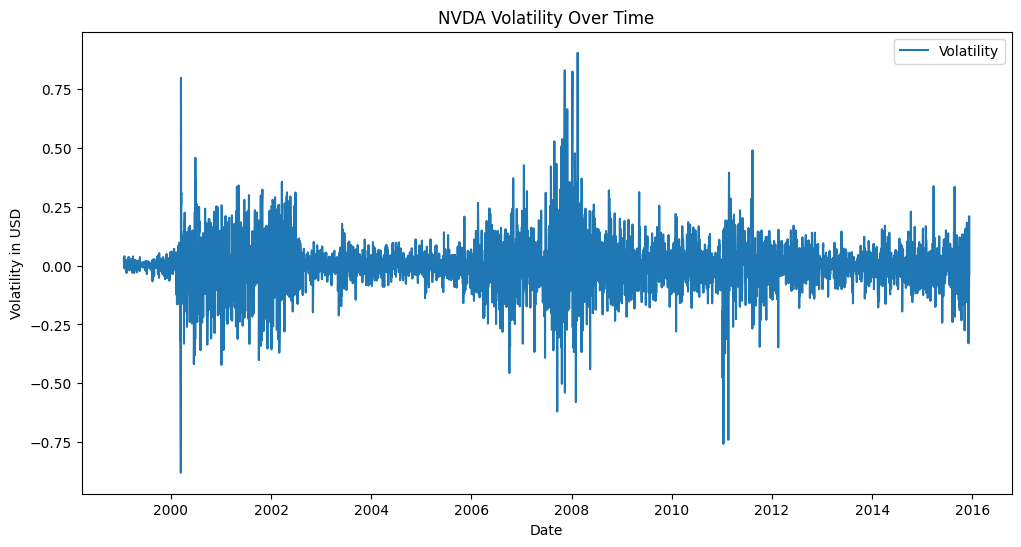

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(time_list[:4250], volatility[:4250], label='Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility in USD')
plt.title('NVDA Volatility Over Time')
plt.legend()
plt.show()

## **Volatilitet rundt diverse kriser**  

**NVIDIA** har alltid hatt store svingninger i aksjekursen. Under **dot-com-krasjet** var volatiliteten over **10 %**, og vi ser lignende bevegelser rundt **finanskrisen**, der aksjen også svingte med **omtrent 10 %**.  

I **2012** opplevde **NVIDIA** et kraftig kursfall på grunn av flere faktorer, men volatiliteten var lavere enn under de tidligere krisene, bare rundt **3–5 %**.  

De relativt små svingningene i **2012** skyldes at dette ikke var en global økonomisk krise, men heller en gradvis nedgang for **NVIDIA** i mobilmarkedet. **Qualcomm Snapdragon** og **Apple A-serien** dominerte markedet, noe som førte til at **NVIDIA** trakk seg ut av mobilbransjen over tid, snarere enn en plutselig kollaps.  

Ganske ny artikkel jeg fant, men veldig kul informasjon å gå i dybde med for Qualcomm [her](https://www.yahoo.com/tech/qualcomm-says-snapdragon-elite-benchmarks-193002916.html)


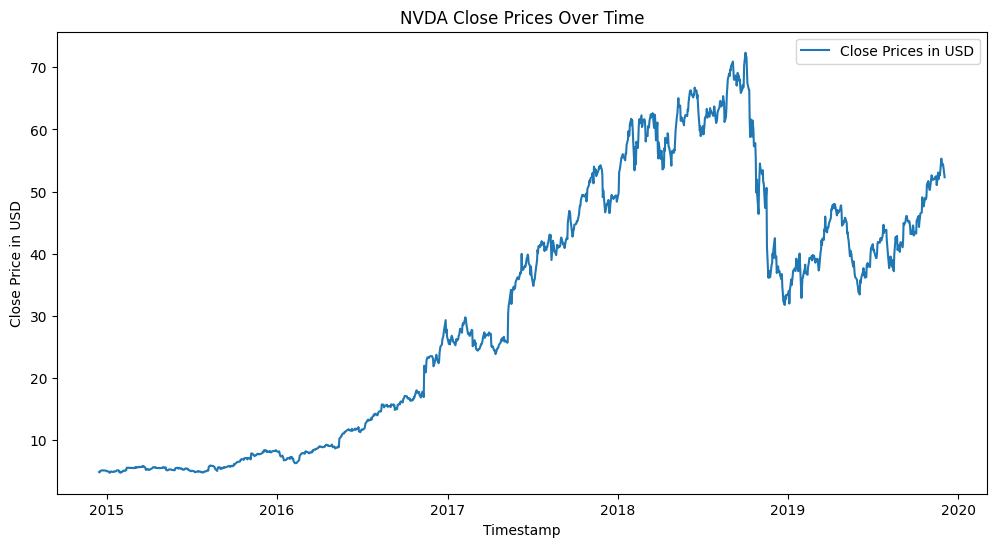

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(time_list[4000:5250], close_prices[4000:5250], label='Close Prices in USD')
plt.xlabel('Timestamp')
plt.ylabel('Close Price in USD')
plt.title('NVDA Close Prices Over Time')
plt.legend()
plt.show()

## **2015 – 2020**  

I denne perioden ser vi en **ekstrem vekst** i **NVIDIA**s aksjekurs – nesten **tidobling på fire år**. Men mot slutten av **2018** kom **kryptovaluta-krasjet**, noe som hadde en betydelig innvirkning på aksjeprisen.  

Mellom **2016 og tidlig 2018** var **kryptovalutamining** en viktig drivkraft for **GPU-salget**, og dermed for **NVIDIA**s vekst. Siden aksjekursen var tett knyttet til kryptomarkedet, falt aksjeverdien til **NVIDIA** i takt med at **Bitcoin** krasjet, som vist i grafen nedenfor.  

[Hvordan Bitcoin-mining fungerer](https://firi.com/cryptocurrency/bitcoin-btc/how-does-bitcoin-mining-work)  

![Bitcoin](https://www.investopedia.com/thmb/Et_AlVWaBHpZ94zLBI2mOsrZiaM=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/bitcoins-price-history-Final3-56d81947a532495ea0b0c3b41e880a8a.png)  

Da kryptomarkedet krasjet i **2018**, **falt etterspørselen etter GPU-er drastisk**, og **NVIDIA** satt igjen med **gigantiske varelager** av usolgte grafikkort. Dette var en alvorlig **feilvurdering av markedet**, ettersom **NVIDIA** hadde **overprodusert GPU-er** i forventning om at etterspørselen skulle forbli høy.  


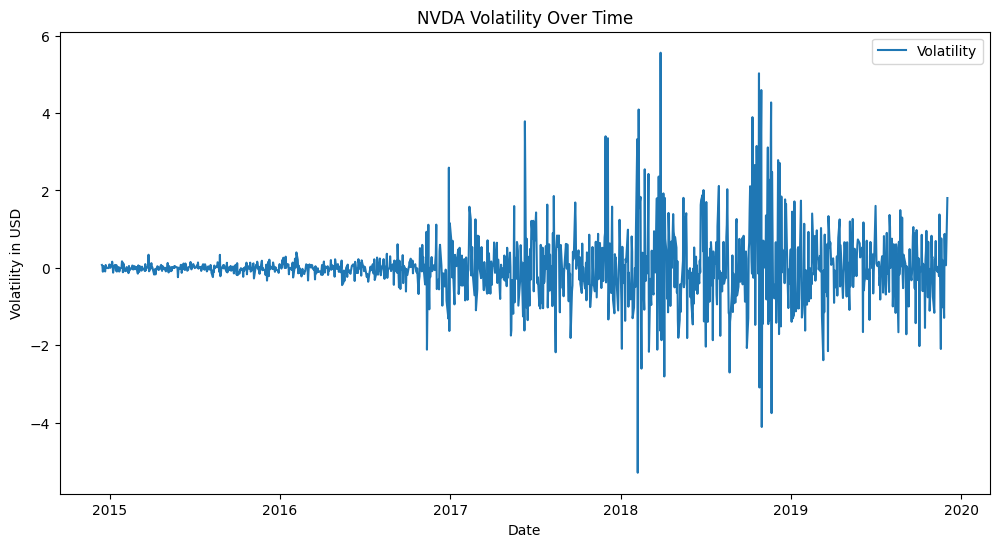

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(time_list[4000:5250], volatility[4000:5250], label='Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility in USD')
plt.title('NVDA Volatility Over Time')
plt.legend()
plt.show()

## **Volatilitet rundt kryptovaluta-krasjet**  

Som vi så tidligere, var **NVIDIA**s aksjekurs nært knyttet til **Bitcoin** og kryptomarkedet. Da **Bitcoin-prisen falt**, fulgte **NVIDIA** etter. Selv om volatiliteten ikke var like ekstrem som under **dot-com-boblen** eller **finanskrisen** (der vi så endringer på over **10 %**), var det likevel **betydelige svingninger**, med kursfall på rundt **7 %**.  

---

## **Slutten av datasettet**  

Den siste delen av datasettet dekker perioden rundt **koronapandemien**. Dessverre er det ikke tilgjengelig **nyere data**, men vi kan likevel analysere de siste trendene for å få en forståelse av **hvordan pandemien påvirket NVIDIA**.  


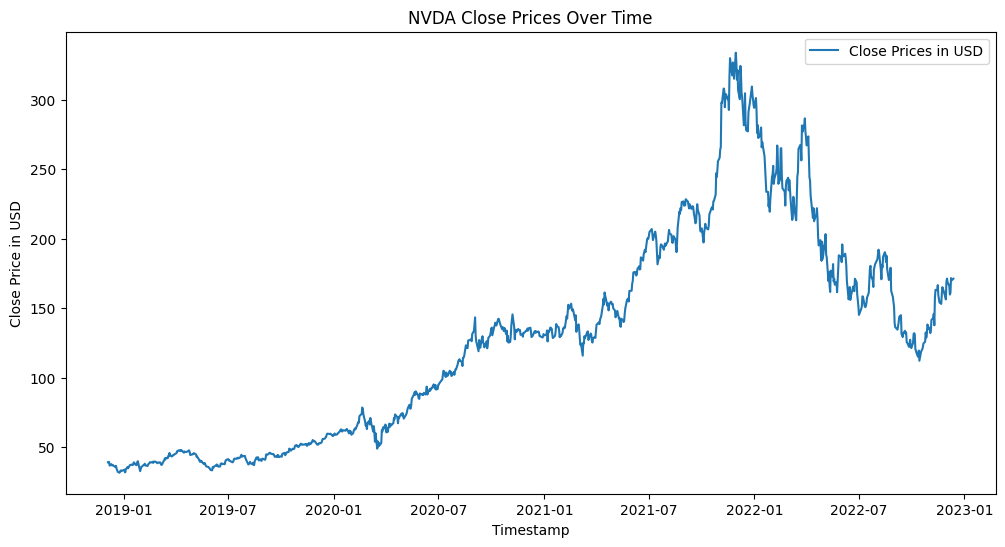

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(time_list[5000:], close_prices[5000:], label='Close Prices in USD')
plt.xlabel('Timestamp')
plt.ylabel('Close Price in USD')
plt.title('NVDA Close Prices Over Time')
plt.legend()
plt.show()

## **NFT-boblen sprekker**  

I perioden **2020 til tidlig 2022** opplevde **NFT-markedet** en eksplosiv vekst, drevet av hypen rundt **digital kunst**, **metaverset** og **spekulasjon**. **NFT-er** ([Non-Fungible Tokens](https://www.investopedia.com/non-fungible-tokens-nft-5115211)) ble promotert som den neste store teknologiske revolusjonen, og mange investorer kastet seg inn i markedet. **Plattformene for kjøp og salg av NFT-er** vokste raskt, og enkelte digitale kunstverk ble solgt for millioner av dollar.  

Men etter toppen i **2022** begynte markedet å kollapse. Årsakene var flere: **overmetning av markedet**, **fallende investorinteresse** og en generell **nedgang i kryptovalutapriser**. Dette speilet seg i **Ethereum** (den mest brukte blokkjeden for NFT-er), hvor prisen falt kraftig, som vist nedenfor:  

![Ethereum](https://investinghaven.com/wp-content/uploads/2025/02/ethereum_ETH_price_prediction_2025_F.png)  

Når **NFT-boblen sprakk**, forsvant etterspørselen etter digitale samleobjekter nesten over natten. Mange investorer satt igjen med **verdiløse NFT-er**, og handelsvolumet på markedsplasser som **OpenSea** falt med over **90 %** fra toppen. **Teknologiselskaper** som satset tungt på NFT-er måtte kutte kostnader, og flere **NFT-prosjekter** ble helt nedlagt.  

Økonomisk sett førte **NFT-kollapsen** til store tap for spekulative investorer og svekket tillit til **kryptoøkonomien generelt**. Selv om **NFT-teknologien** fortsatt brukes i nisjeområder som **gaming** og **eierskapsbevis**, er det tydelig at den massive **spekulasjonsbølgen** var en midlertidig trend fremfor en varig revolusjon.  


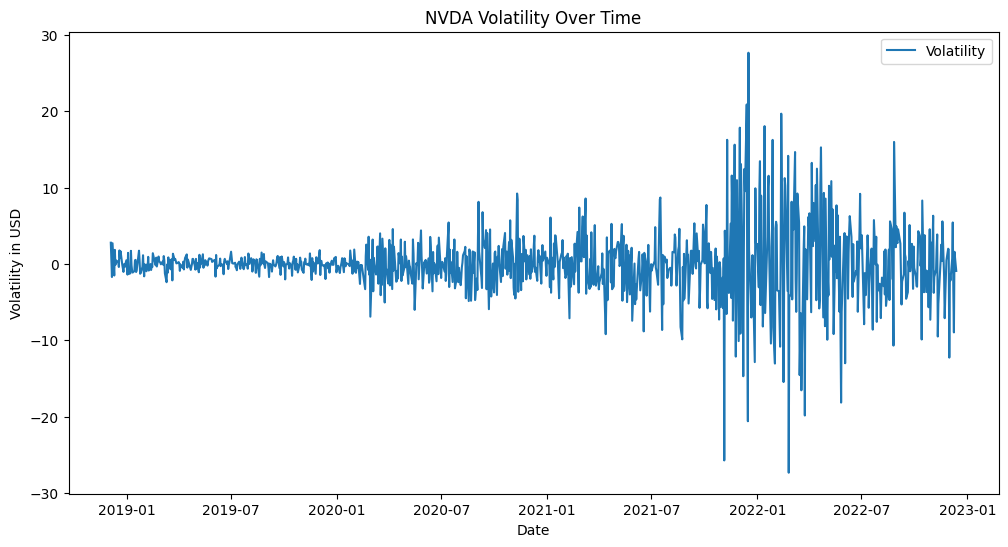

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(time_list[5000:], volatility[5000:], label='Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility in USD')
plt.title('NVDA Volatility Over Time')
plt.legend()
plt.show()

## **Volatilitet rundt koronatiden**  

Rundt **2020** ser vi en betydelig økning i **volatilitet**, noe som gir mening ettersom koronapandemien skapte stor usikkerhet. Spesielt under **lockdown**, da folk ble tvunget til å holde seg hjemme, var det uklart hvordan økonomien ville utvikle seg.  

Når store deler av verden var stengt ned, ble **digital kommunikasjon** den eneste måten å holde kontakt på. Dette førte til økt etterspørsel etter **datamaskiner, GPU-er og nettbaserte tjenester**. **NVIDIA**, som var en av de ledende aktørene innen grafikkprosessorer og AI-teknologi, opplevde enorm vekst i denne perioden. Vi ser derfor en **gjennomsnittlig oppgang** i aksjekursen.  

Samtidig førte **lockdown-perioden** til økt interesse for **kryptovaluta** og **NFT-er**. **NFT-er** ble kjøpt med kryptovaluta, som ofte ble skaffet gjennom **mining** – en prosess som krevde kraftige GPU-er. **NVIDIA dro nytte av dette** og så en periode med rask vekst.  

Men da NFT-markedet kollapset, fulgte **NVIDIA-aksjen** etter. **Volatiliteten økte kraftig**, med svingninger på **10–15 %**, noe som viser hvor ustabil aksjen var på dette tidspunktet.  

Her er noen grafer rundt Koronatiden, og en som sammenligner det med andre kriser som finanskrisen og dot-com krisen:

![Korona](https://pub.mdpi-res.com/jrfm/jrfm-14-00330/article_deploy/html/images/jrfm-14-00330-g001.png?1626417472)

![Korona Sammenlignet](https://cepr.org/sites/default/files/styles/flexible_wysiwyg/public/CapelleFigure1.PNG?itok=1sShRiQe)
---

## **Volume of transactions**  

Videre skal vi analysere hvor mange **transaksjoner** som har blitt gjennomført i løpet av **NVIDIA sin levetid**. Dette gjøres ved å:  

1. **Lage en liste** over handelsvolumet  
2. **Finne hvor dataene er lagret**  
3. **Plotte grafen** for å visualisere trenden  
4. **Formatere volumet** fra **1e6** til **"millions"** for bedre lesbarhet  


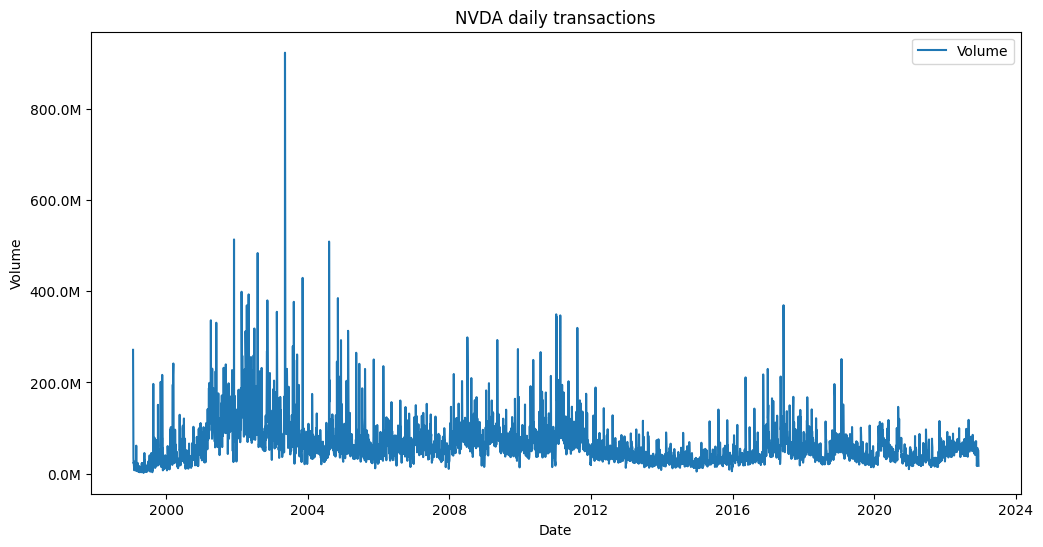

In [ ]:
# Samme teknikk for å få liste med data avvolumet.

from matplotlib.ticker import FuncFormatter

volume = []


transactions = nd['chart']['result'][0]['indicators']['quote'][0]['volume']

for amount in transactions:
    volume.append(amount)

# Funksjon jeg brukte for Apple, fant på nettet
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)



plt.figure(figsize=(12, 6))
plt.plot(time_list, volume, label='Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('NVDA daily transactions')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions)) # bruker teknikken jeg så på nettet for å omgjøre grafens y akse sin benevning
plt.legend()
plt.show()

## Problem med Volum graf

Et hovedproblem med å bruke en graf som viser volum, er at antallet transaksjoner ofte er høyere når aksjekursen er lavere. Dette gjør det vanskelig å se om folk handler mer i dag enn tidligere, da volumet kan være misvisende uten å ta hensyn til aksjekursen. For å løse dette problemet, justerer vi volumet etter aksjekursen.

Vi kan gjøre dette ved å multiplisere aksjekursen med volumet av NVIDIA-aksjer som ble handlet på hver dag. Dette gir oss et mer presist mål på den totale verdien av aksjene som er handlet, uavhengig av aksjekursens nivå. På denne måten kan vi bedre sammenligne volumet over tid, og få en klarere forståelse av hvordan handelen har utviklet seg.

Med denne justeringen får vi et mer nøyaktig bilde av handelsaktiviteten, og kan lettere se om handelen har økt eller minket i forhold til aksjekursens endringer.



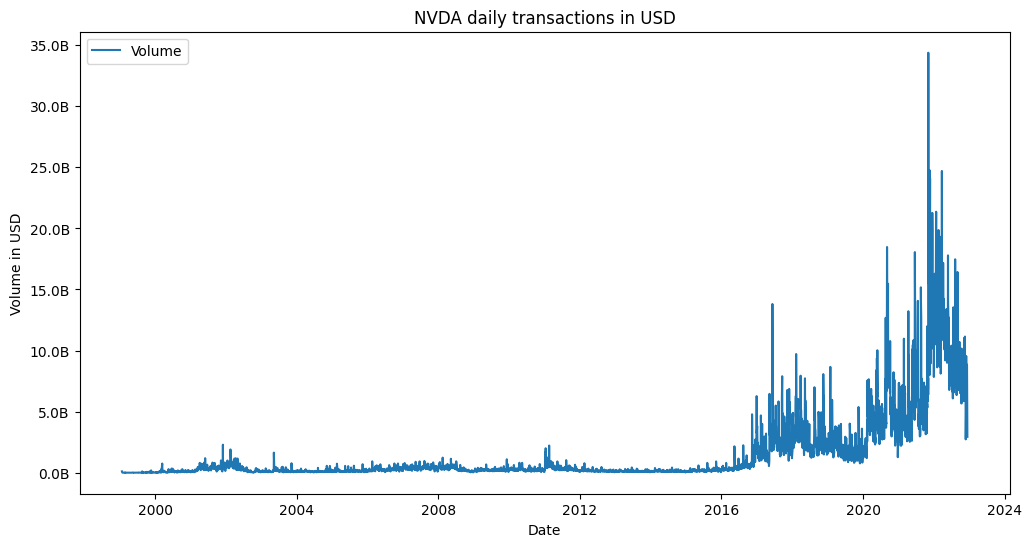

In [57]:
# Endrer millions til billions med å ta 1e-6 til 1e-9
def billions(x, pos):
    return '%1.1fB' % (x * 1e-9)


# bruker samme zip metode i en "listeforståelse" for å multiplisere volum og close priser inni hverandre
volume_close_product = [v * c for v, c in zip(volume, close_prices)]


plt.figure(figsize=(12, 6))
plt.plot(time_list, volume_close_product, label='Volume')
plt.xlabel('Date')
plt.ylabel('Volume in USD')
plt.title('NVDA daily transactions in USD')
plt.gca().yaxis.set_major_formatter(FuncFormatter(billions))
plt.legend()
plt.show()

## Volumgrafen

Denne justeringen gir en bedre representasjon av handelsaktiviteten for NVIDIA i dollar, basert på mengden transaksjoner som skjer daglig. Når vi ser på grafen, kan vi identifisere fire merkbare perioder: starten av 2000-tallet, 2008, 2011, og perioden etter 2017. Vi vil undersøke nærmere hva som skjedde på disse tidspunktene for å forklare hvorfor så mange kjøpte eller solgte aksjer på disse spesifikke tidene.

Noe jeg leste om er at mengde folk som handlet aksjer gikk stadig ned over en lang periode (fra 2000-2016), men 2017 og videre startet mer folk enn noen gang å handle aksjer. Her er en graf, mangler nyere årstall, men mengde folk som handler aksjer gikk opp.

![Amerikanere aksjehandel](https://20somethingfinance.com/wp-content/uploads/2016/04/percent-of-americans-that-invest-in-stocks.png)

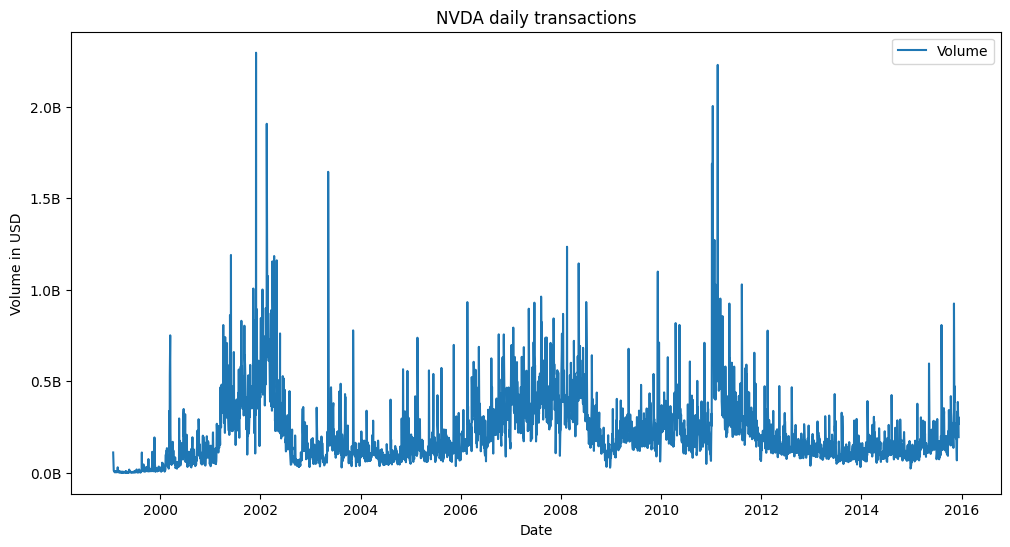

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(time_list[:4250], volume_close_product[:4250], label='Volume')
plt.xlabel('Date')
plt.ylabel('Volume in USD')
plt.title('NVDA daily transactions')
plt.gca().yaxis.set_major_formatter(FuncFormatter(billions))
plt.legend()
plt.show()

## NVIDIA ved starten av 2000-tallet

I denne perioden kan vi tydelig se hvordan handelsvolumet, i pengeverdi, var høyere på spesifikke tidspunkter, noe som indikerer både kjøp og salg. Når volumet er på topp, kan det være et resultat av positive nyheter som får folk til å kjøpe, eller negative trender som får investorer til å selge aksjene sine ([Liquidity](https://www.investopedia.com/terms/l/liquidity.asp)). Dette var spesielt merkbart i periodene rundt 2001-2002, 2008 og i 2011.

I perioden 2001-2002, til tross for Dot-com-boblens kollaps, ble NVIDIA stimulert av noen viktige milepæler, som lanseringen av GeForce 3, inngåelsen av en avtale med Microsoft og produksjonen av GPU-er til den nye Xbox-en. Disse positive hendelsene hjalp med å holde aksjekursen oppe. Men etter hvert ble det klart at nedgangen i PC-salget ble for stor, og aksjekursen falt sammen med mange andre etter at Dot-com-boblen sprakk.

Rundt finanskrisen i 2008 ser vi et økt volum av aksjehandel, noe som kan skyldes at mange investorer måtte selge aksjer for å dekke gjeld. Dette førte til en betydelig økning i handelsaktiviteten, som deretter falt tilbake mot slutten av 2009.

I 2011 så vi igjen et betydelig fall i aksjekursen, delvis på grunn av konkurransen fra Apple-produkter som iPhone, som dominerte markedet, og på grunn av Intel som tok markedsandeler fra NVIDIA på PC-siden.

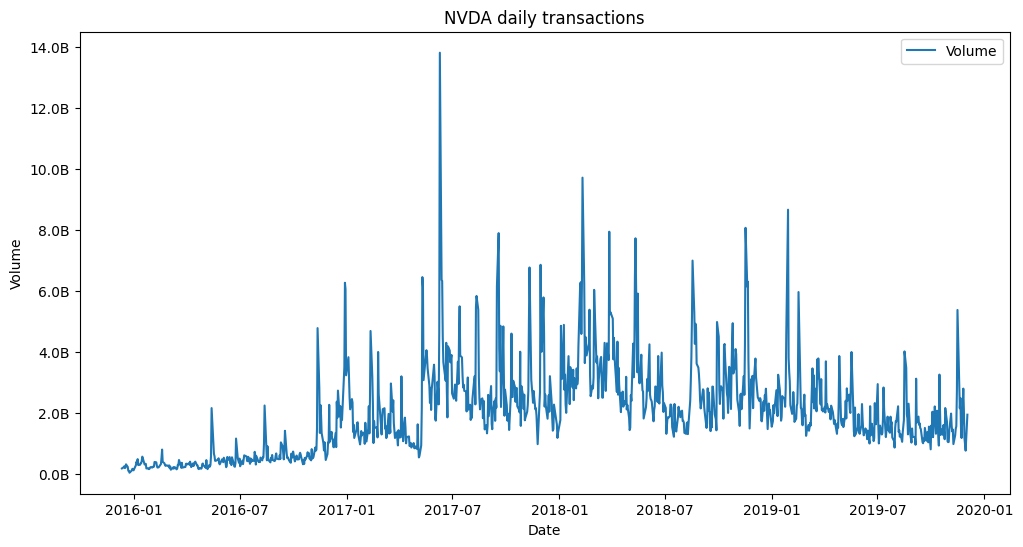

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(time_list[4250:5250], volume_close_product[4250:5250], label='Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('NVDA daily transactions')
plt.gca().yaxis.set_major_formatter(FuncFormatter(billions))
plt.legend()
plt.show()

## NVIDIA ved 2018

I 2018 ser vi en utvikling i NVIDIA sin aksjekurs som på mange måter kan sammenlignes med kursene til kryptovalutaer som Bitcoin og Ethereum. Dette året opplevde kryptomarkedet en eksplosiv vekst, og det var en betydelig økning i etterspørselen etter GPU-er ettersom de ble brukt til å "mine" kryptovaluta. NVIDIA, som en ledende produsent av grafikkprosessorer, opplevde en stor oppgang i aksjeprisen, drevet av den sterke etterspørselen fra kryptovalutamining.

Graph med Ethereum:
![Ethereum](https://www.researchgate.net/publication/375628468/figure/fig2/AS:11431281204806807@1699972715756/Ethereum-ETH-USD-price-history-up-until-July-2023-C-Statista-2023.png)

Dette fenomenet reflekterte en spekulativ boble i kryptomarkedet, der investorer kjøpte grafikkort for å dra nytte av høyere utvinning av kryptovaluta. Akkurat som kryptovalutaene, nådde NVIDIA aksjekursen en topp, for så å falle når kryptomarkedet kollapset mot slutten av 2018.

Etterspørselen etter GPU-er gikk drastisk ned, noe som førte til en betydelig nedgang i NVIDIA sin aksjekurs. Dette er et tydelig eksempel på hvordan eksterne faktorer som kryptomarkedet kan ha stor innvirkning på aksjekursen til teknologiselskaper.



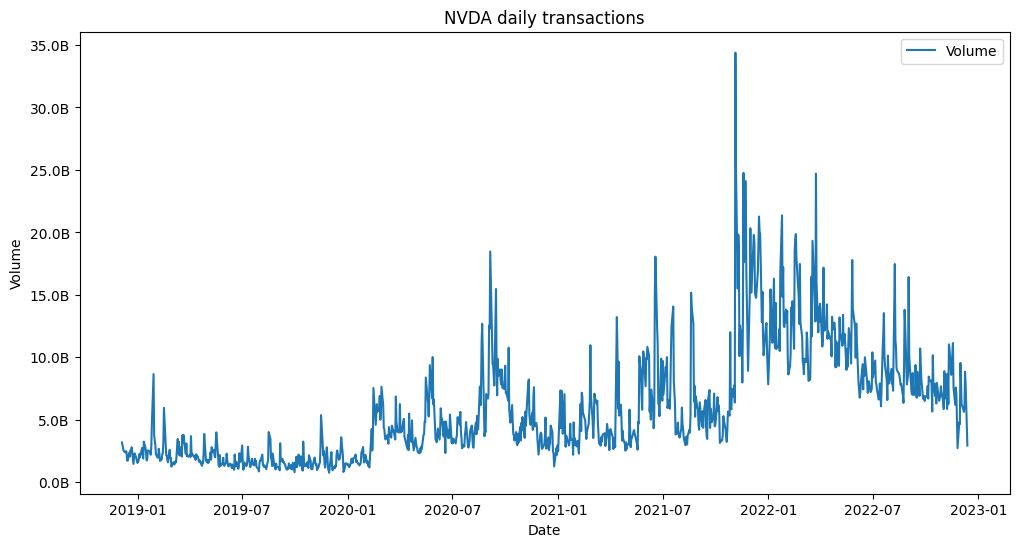

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(time_list[5000:], volume_close_product[5000:], label='Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('NVDA daily transactions')
plt.gca().yaxis.set_major_formatter(FuncFormatter(billions))
plt.legend()
plt.show()

## NFT boblen

NFT-boblen
I perioden fra starten av 2019 til begynnelsen av 2023, som markerer slutten av tilgjengelig data, ser vi tydelige spor av to store hendelser: koronapandemien og NFT-boblen. Begge hadde stor påvirkning på markedet, og vi kan se hvordan disse hendelsene reflekteres i NVIDIA sin aksjehandel.

---

## Koronapandemiens påvirkning

Pandemien førte til en betydelig økning i digital aktivitet, da folk måtte være mer hjemme. Dette skapte økt etterspørsel etter datamaskiner, grafikkprosessorer og teknologi generelt. NVIDIA, som en stor aktør innen grafikkbrikker, opplevde vekst i aksjeprisen, ettersom folk investerte mer i gaming-PC-er, skjermer og grafikkprosessorer.

Samtidig opplevde NFT-markedet en eksplosiv vekst rundt 2021. Nye digitale kunstverk og samleobjekter ble solgt for enorme beløp, og mange trodde på et potensial for et langsiktig skifte i hvordan kunst og eiendom skulle eies og handles. NFT-ene ble ofte kjøpt og solgt med kryptovaluta, noe som førte til økt etterspørsel etter GPU-er for kryptomining.

Men som med de fleste bobler, begynte markedet å kollapsere mot slutten av 2022. Etterspørselen etter NFT-er sank kraftig, og verdien på kryptovalutaene som støttet disse samlermarkedene, falt også. Dette førte til en skarp nedgang i aksjeprisen til NVIDIA, da investorer mistet tilliten til de spekulative markedene som hadde vært knyttet til deres produkter.

Vi kan se interessen for NFT-er gå ned med å se at mengde google søk gikk ned, ganske lik til mengde investorer.
![NFT](https://assets.weforum.org/editor/4TzxGxyjwwUq95mSXNUPk4USl2bpfTG7nPdRLZ0AqCc.png)



## Videre

Ikke alt dataen er fremstilt i filen, dermed kan jeg forklare det her. Siden starten av 2023 har NVIDIA opplevd en kraftig økning i aksjekursen, drevet av den eksplosive veksten i kunstig intelligens (KI). Etterspørselen etter selskapets GPU-er, som er essensielle for KI-trening og maskinlæring ([Compute](https://aws.amazon.com/what-is/compute/) som det heter), har økt betydelig ettersom flere bransjer har implementert avanserte AI-løsninger. Dette har ført til rekordinntekter og økt markedsverdi, og NVIDIA har blitt sett på som en nøkkelaktør i AI-revolusjonen.

Samtidig har NVIDIA møtt utfordringer som følge av økt konkurranse og usikkerhet i markedet. Nye aktører i KI-sektoren og bekymringer om teknologiutvikling har ført til svingninger i aksjekursen. Selv om selskapet fortsatt drar nytte av AI-trenden, påvirkes aksjekursen av den pågående konkurransen og volatiliteten i teknologimarkedene.

---

# Konklusjon

NVIDIA har gjennomgått en spennende og VELDIG volatil reise fra starten av 2000-tallet til 2023. Gjennom ulike økonomiske kriser, teknologiske revolusjoner og markedsbølger har selskapet både møtt utfordringer og opplevd stor vekst (NVIDIA har hatt de største vekst dagene, og også nedgang dagene). Fra den tidlige dot-com-boblen, der selskaper som NVIDIA var preget av usikkerhet, til dannelsen av kryptovaluta og NFT-er på midten av 2010-tallet, har aksjeverdien vært tett knyttet til eksterne faktorer som teknologiske trender og globale kriser.

I tillegg har de siste årene vært preget av økt etterspørsel etter GPU-er drevet av gaming, kryptomining og digitale kunstmarkeder som NFT-er. Samtidig har også koronapandemien hatt en betydelig innvirkning på aksjeverdien, da etterspørselen etter teknologi og digitale løsninger økte betraktelig.

Selv om det er synd at vi ikke har tilgang til all relevant data, har analysen av volum og volatilitet gitt innsikt i de store markedsbevegelsene som har formet NVIDIA sin utvikling. Dette gir oss et godt grunnlag for å forstå hvordan eksterne faktorer, som teknologiutvikling og økonomiske kriser, har påvirket selskapets aksjepris og handelsvolum over tid.
